#  Output forcing field

In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline

## Definitions

## Read OutData file

In [5]:
tc=pd.read_csv('test/step3.txt',delimiter='\t')

In [6]:
tc.head()

,time,t,hurName,lat,lon,pcenter,penv,rmax,vmax,34ne,...,w34sw,w34nw,vmax0vt,b,dph,k,np.max(V),rmaxh,rmse,vmax1
0,0.0,2010-10-29 06:00:00,INVEST,9.0,-53.7,1006,1009,222240.0,15.433333,0.0,...,0.000000,0.000000,5.069814,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,2010-10-29 12:00:00,INVEST,9.8,-55.3,1003,1009,166680.0,18.005556,138900.0,...,18.059481,16.718113,18.059481,0.834438,1258.498359,0.243277,18.059481,21682.563288,0.851460,18.328515
2,12.0,2010-10-29 18:00:00,TOMAS,10.8,-56.8,998,1009,55560.0,23.150000,166680.0,...,18.366306,17.301589,18.366306,0.818659,1329.926395,0.237769,18.366306,21661.550932,0.640642,18.662474
3,18.0,2010-10-30 00:00:00,TOMAS,11.9,-57.8,999,1009,55560.0,28.294444,166680.0,...,18.525193,17.452947,25.859722,1.075345,1985.439213,0.203935,25.859722,18222.673691,2.022738,26.134012
4,24.0,2010-10-30 06:00:00,TOMAS,12.7,-58.9,997,1009,55560.0,30.866667,166680.0,...,18.632523,17.383112,25.728973,1.128241,1875.973405,0.243425,25.728973,18239.788040,1.978298,26.020643


Now we need to interpolate for every hour the location and compute translational velocities while keeping the rest of the attributes the same

In [7]:
tstamps = tc['t'].apply(pd.to_datetime)

In [8]:
tc = tc.set_index(tstamps)

In [9]:
tc.head()

,time,t,hurName,lat,lon,pcenter,penv,rmax,vmax,34ne,...,w34sw,w34nw,vmax0vt,b,dph,k,np.max(V),rmaxh,rmse,vmax1
t,,,,,,,,,,,,,,,,,,,,,
2010-10-29 06:00:00,0.0,2010-10-29 06:00:00,INVEST,9.0,-53.7,1006,1009,222240.0,15.433333,0.0,...,0.000000,0.000000,5.069814,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-29 12:00:00,6.0,2010-10-29 12:00:00,INVEST,9.8,-55.3,1003,1009,166680.0,18.005556,138900.0,...,18.059481,16.718113,18.059481,0.834438,1258.498359,0.243277,18.059481,21682.563288,0.851460,18.328515
2010-10-29 18:00:00,12.0,2010-10-29 18:00:00,TOMAS,10.8,-56.8,998,1009,55560.0,23.150000,166680.0,...,18.366306,17.301589,18.366306,0.818659,1329.926395,0.237769,18.366306,21661.550932,0.640642,18.662474
2010-10-30 00:00:00,18.0,2010-10-30 00:00:00,TOMAS,11.9,-57.8,999,1009,55560.0,28.294444,166680.0,...,18.525193,17.452947,25.859722,1.075345,1985.439213,0.203935,25.859722,18222.673691,2.022738,26.134012
2010-10-30 06:00:00,24.0,2010-10-30 06:00:00,TOMAS,12.7,-58.9,997,1009,55560.0,30.866667,166680.0,...,18.632523,17.383112,25.728973,1.128241,1875.973405,0.243425,25.728973,18239.788040,1.978298,26.020643


In [10]:
tc_ = tc.resample('H').mean()

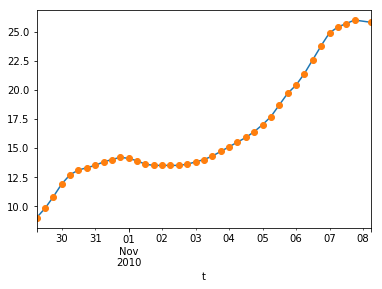

In [11]:
ax = tc_['lat'].interpolate(method='linear').plot()
tc_['lat'].plot(ax=ax, marker='o')

In [14]:
data = tc_.interpolate(method='cubic')

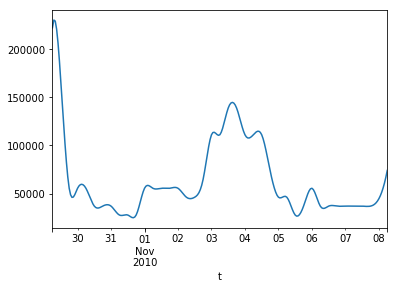

In [15]:
data['rmax'].plot()

# From lat lon to r, th

In [56]:
# required function
from math import radians, cos, sin, asin, sqrt
def Haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1 = np.radians([lon1, lat1])
    lon2, lat2 = np.radians([ lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    km = 6378.388 * c
    return  km

In [23]:
def pres(r):
    return pn+dph*np.exp(-(rmaxh/r)**bh)

In [58]:
def hvel2d(l1,l2,lon0,lat0):
    r = Haversine(l1, l2, lon0, lat0)
    xh=0.5+(r-rmaxh)/(maxR-rmaxh)*kh
    ur=(bh/rhoa*(rmaxh/r)**bh*dph*np.exp(-(rmaxh/r)**bh))**xh
    theta=np.arctan2((l2-lon0),(l1-lat0))
    ux=-ur*np.sin(theta)
    uy=ur*np.cos(theta)
    return ux+vtx,uy+vty, pres(r)

## for one time stamp

In [64]:
i=5

In [65]:
#define lat/lon window
minlon=tc.lon[i]-5.
maxlon=tc.lon[i]+5.
minlat=tc.lat[i]-5.
maxlat=tc.lat[i]+5.

In [66]:
lons=np.linspace(minlon, maxlon,1000) # constract arrays
lats=np.linspace(minlat, maxlat,1000)

In [67]:
q1,q2=np.meshgrid(lons,lats) # create grid

In [68]:
#compute u,v,p

In [81]:
tc.ix[i,['b','k','dph','rmaxh']]

b         1.05622
k        0.201499
dph       2714.54
rmaxh       15400
Name: 2010-10-30 12:00:00, dtype: object

In [59]:
zx,zy,pr=hvel2d(q1,q2,tc.lon[0],tc.lat[0])
vel=np.sqrt(zx**2+zy**2)

NameError: global name 'rmaxh' is not defined

In [ ]:
vtx=-4.6
vty=3.35